In [66]:
# Bibliotecas
# Manipulação de dados
import pandas as pd
import numpy as np

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Setando
plt.style.use('ggplot')

In [67]:
# Base de dados
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [68]:
# Verificando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [69]:
# Nulos no dataset
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

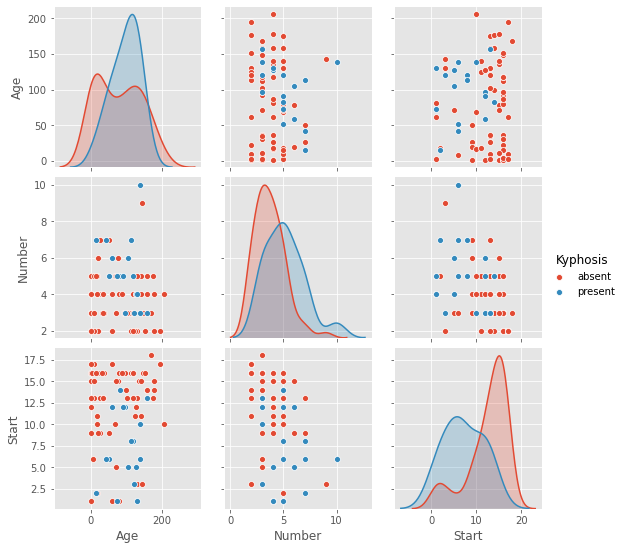

In [70]:
# Pairplot para visualizar as relações
sns.pairplot(df, hue='Kyphosis')

# Construção do Modelo de ML

In [71]:
# Para arvore de decisão não precisa normalizar
# Dividindo em X e y

y = df.pop('Kyphosis')
X = df

In [72]:
# Divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
# Utilizando modelo de Decision Tree
dtc = DecisionTreeClassifier()

In [74]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
# Acurácia de Teste
dtc.score(X_test, y_test)

0.72

In [76]:
# Acurácia de Treino
dtc.score(X_train, y_train)

1.0

In [77]:
y_pred = dtc.predict(X_test)

In [78]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



In [79]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[16  3]
 [ 4  2]]


In [80]:
# Resultado não foi bom, modelo sofreu overfitting
# Podemos podar a árvore ou então usar um outro modelo.
# Neste caso usarei Random Forest para comparar

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.84

In [81]:
y_pred_rfc = rfc.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

      absent       0.83      1.00      0.90        19
     present       1.00      0.33      0.50         6

    accuracy                           0.84        25
   macro avg       0.91      0.67      0.70        25
weighted avg       0.87      0.84      0.81        25



In [83]:
print(confusion_matrix(y_test, y_pred_rfc))

[[19  0]
 [ 4  2]]


In [84]:
# Não melhorou nossos FN, mas zerou nosso FP.
# Dependendo do balanceamento desejado podemos utilizar este classificador

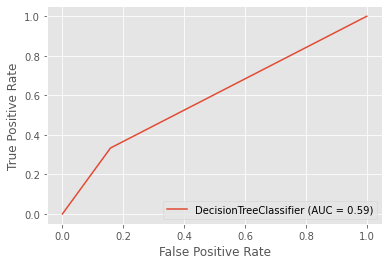

In [85]:
# Por fim, a comparação da curva ROC

plot_roc_curve(dtc, X_test, y_test)

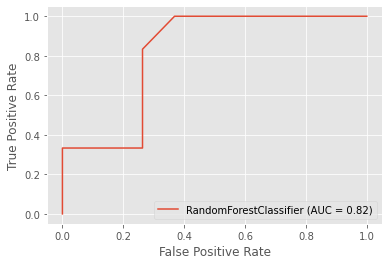

In [86]:
# Por fim, a comparação da curva ROC

plot_roc_curve(rfc, X_test, y_test)

In [87]:
# Temos poucos dados, mas podemos perceber que nosso melhor resultado foi
# com o Random Forest.
# Podemos ver claramente a curva ROC.

# Exemplo de plot da árvore de decisão

In [88]:
# Para visualizar a árvore de decisão

from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree
import pydot

In [89]:
features = list(X.columns)
features

['Age', 'Number', 'Start']

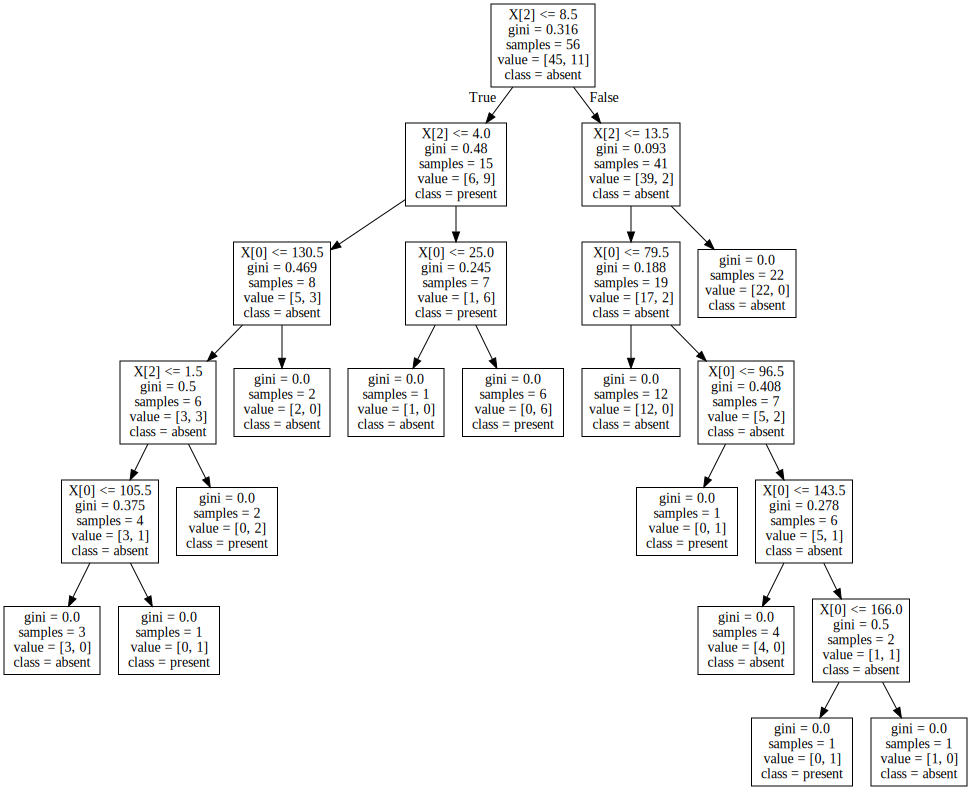

In [90]:
dot_data = tree.export_graphviz(dtc, class_names=['absent', 'present'], out_file=None)
graph = graphviz.Source(dot_data)
graph